In [2]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
import astropy.io.fits as pf
import warnings
from astropy.table import Table, vstack
warnings.filterwarnings('ignore')
import scipy.stats as ss 

In [27]:
def getting_the_pair_catalog(all_catalog,object_type):
    if object_type=='LRG':
        search_short = np.where((all_catalog['subset']!='all') & 
                        (all_catalog['subset']!='deep') & 
                        (all_catalog['TARGETS']!='BGS+MWS') & 
                        (all_catalog['EFFTIME_DARK']>1050) & 
                        (all_catalog['EFFTIME_DARK']<1150))
        catalog_short_all = all_catalog[search_short[0]]
        catalog_short_pd = catalog_short_all[['TARGETID','Z','ZERR','TILEID','EFFTIME_DARK','DELTACHI2','ZWARN','FIBER','subset','FIBERFLUX_R','FIBERFLUX_Z','FLUX_W1','FLUX_R','FLUX_Z','FLUX_G','EBV']].to_pandas()
        catalog_match = catalog_short_pd.merge(catalog_short_pd,on='TARGETID',how='left',suffixes=("","_2"))
        catalog_match = catalog_match[catalog_match['subset']!=catalog_match['subset_2']]
        catalog_match['zfibermag']=-2.5*np.log10(catalog_match['FIBERFLUX_Z'])+22.5-1.211*catalog_match['EBV']
        catalog_match['dv']=(catalog_match['Z']-catalog_match['Z_2'])/(1+catalog_match['Z'])*300000
        catalog_match['zmag']=-2.5*np.log10(catalog_match['FLUX_Z'])+22.5-1.211*catalog_match['EBV']
        catalog_match['gmag']=-2.5*np.log10(catalog_match['FLUX_G'])+22.5-3.214*catalog_match['EBV']
        catalog_match['rmag']=-2.5*np.log10(catalog_match['FLUX_R'])+22.5-2.165*catalog_match['EBV']
        catalog_match['w1mag']=-2.5*np.log10(catalog_match['FLUX_W1'])+22.5-0.184*catalog_match['EBV']
    elif object_type=='BGS':
        search_short = np.where((all_catalog['subset']!='all') & 
                (all_catalog['subset']!='deep') & 
                #(all_catalog['TARGETS']!='BGS+MWS') & 
                (all_catalog['EFFTIME_BRIGHT']>150) & 
                (all_catalog['EFFTIME_BRIGHT']<200))
        catalog_short_all = all_catalog[search_short[0]]
        
        catalog_short_pd = catalog_short_all['TARGETID','Z','TILEID','DELTACHI2','FIBERFLUX_R',
                                        'FIBERFLUX_Z','FLUX_W1','FLUX_R','FLUX_Z','FLUX_G','EBV','ZWARN','FIBER','SPECTYPE','subset'].to_pandas()
        new_catalog = catalog_short_pd.merge(catalog_short_pd,on='TARGETID',how='left',suffixes=("","_2"))
        new_catalog = new_catalog[new_catalog['subset']!=new_catalog['subset_2']]
        new_catalog['dv']=(new_catalog['Z']-new_catalog['Z_2'])/(1+new_catalog['Z'])*300000

        new_catalog['zmag']=-2.5*np.log10(new_catalog['FLUX_Z'])+22.5-1.211*new_catalog['EBV']
        new_catalog['gmag']=-2.5*np.log10(new_catalog['FLUX_G'])+22.5-3.214*new_catalog['EBV']
        new_catalog['rmag']=-2.5*np.log10(new_catalog['FLUX_R'])+22.5-2.165*new_catalog['EBV']
        new_catalog['w1mag']=-2.5*np.log10(new_catalog['FLUX_W1'])+22.5-0.184*new_catalog['EBV']
        new_catalog['zfibermag']=-2.5*np.log10(new_catalog['FIBERFLUX_Z'])+22.5-1.211*new_catalog['EBV']
        new_catalog['rfibermag']=-2.5*np.log10(new_catalog['FIBERFLUX_R'])+22.5-2.165*new_catalog['EBV']
        new_catalog['color']=(new_catalog['zmag']-new_catalog['w1mag'])-1.2*(new_catalog['gmag']-new_catalog['rmag'])+1.2
        
        catalog_match=new_catalog
    elif object_type=='ELG':
        search_short = np.where((all_catalog['subset']!='all') & 
                (all_catalog['subset']!='deep') & 
                #(all_catalog['TARGETS']!='BGS+MWS') & 
                (all_catalog['EFFTIME_DARK']>850) & 
                (all_catalog['EFFTIME_DARK']<950))
        catalog_short_all = all_catalog[search_short[0]]
        
        catalog_short_pd = catalog_short_all['TARGETID','Z','TILEID','DELTACHI2','FIBERFLUX_R',
                                        'FIBERFLUX_Z','FLUX_W1','FLUX_R','FLUX_Z','FLUX_G','EBV','ZWARN','FIBER','SPECTYPE','subset','FOII','FOII_ERR','GTOT','GFIB','GR','RZ'].to_pandas()
        new_catalog = catalog_short_pd.merge(catalog_short_pd,on='TARGETID',how='left',suffixes=("","_2"))
        new_catalog = new_catalog[new_catalog['subset']!=new_catalog['subset_2']]
        new_catalog['dv']=(new_catalog['Z']-new_catalog['Z_2'])/(1+new_catalog['Z'])*300000
        
        new_catalog['zmag']=-2.5*np.log10(new_catalog['FLUX_Z'])+22.5-1.211*new_catalog['EBV']
        new_catalog['gmag']=-2.5*np.log10(new_catalog['FLUX_G'])+22.5-3.214*new_catalog['EBV']
        new_catalog['rmag']=-2.5*np.log10(new_catalog['FLUX_R'])+22.5-2.165*new_catalog['EBV']
        new_catalog['w1mag']=-2.5*np.log10(new_catalog['FLUX_W1'])+22.5-0.184*new_catalog['EBV']
        new_catalog['zfibermag']=-2.5*np.log10(new_catalog['FIBERFLUX_Z'])+22.5-1.211*new_catalog['EBV']
        new_catalog['rfibermag']=-2.5*np.log10(new_catalog['FIBERFLUX_R'])+22.5-2.165*new_catalog['EBV']
        new_catalog['color']=(new_catalog['zmag']-new_catalog['w1mag'])-1.2*(new_catalog['gmag']-new_catalog['rmag'])+1.2
        #new_catalog['best_z']=new_catalog['Z']
        new_catalog['OII_SN']=new_catalog['FOII']/new_catalog['FOII_ERR']
        new_catalog['OII_SN_2']=new_catalog['FOII_2']/new_catalog['FOII_ERR_2']
        new_catalog['quality']=0
        selection = (np.log10(new_catalog['OII_SN'])>0.9-0.2*np.log10(new_catalog['DELTACHI2'])) & (np.log10(new_catalog['OII_SN_2'])>0.9-0.2*np.log10(new_catalog['DELTACHI2_2'])) & (new_catalog['FOII']>0) & (new_catalog['FOII_2']>0)
        new_catalog['quality'][selection]=1
        catalog_match=new_catalog        
    return catalog_match

In [4]:
def plot_the_curve(base_line_catalog,base_line_catalog_SV3):
    plt.figure(figsize=(15,5))
    for i_data in range(0,2):
        if i_data==0:
            data = base_line_catalog
        else:
             data = base_line_catalog_SV3
        mag_bin = np.arange(0.4,1.11,0.1)
        ave_bin = []
        mad_all = []
        std_all = []
        mean_all = []
        for i in range(0,len(mag_bin)-1):
            ave_bin.append((mag_bin[i]+mag_bin[i+1])/2.)
            selection = (data['Z']>mag_bin[i]) & (data['Z']<mag_bin[i+1])
            #print(len(base_line_catalog[selection]))
            mad_all.append(ss.median_absolute_deviation(data['dv'][selection]))
            std_all.append(np.std(data['dv'][selection]))
            mean_all.append(np.mean(data['dv'][selection]))
        plt.subplot(1,2,1+i_data)
        plt.plot(ave_bin,mad_all/np.sqrt(2),label='MAD/sqrt(2)')
        plt.plot(ave_bin,mad_all,label='MAD')
        plt.plot(ave_bin,std_all,label='Standard deviation',ls=':')
        print(std_all)
        plt.legend()
        plt.xlabel('Redshift')
        plt.ylabel('km/s')
        if i_data ==0:
            plt.text(22.5,50,'SV1 selection')
        else:
            plt.text(22.5,50,'SV3 selection')
        plt.ylim(0,200)
        plt.title('ELG 0.6<z<1.6 850<EFFTIME_DARK<950') 

In [19]:
object_type = 'LRG'
diretory = '/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/cascades/3.1/LRG/'
if object_type =='LRG':
    dataname = 'alltiles_LRGzinfo.fits'
elif object_type =='LRG_VI':    
    dataname = 'allVItiles_LRGzinfo_wVI.fits'
all_catalog = Table.read(diretory+dataname)

In [20]:
match_catalog = getting_the_pair_catalog(all_catalog,object_type)

In [21]:
base_selection = (match_catalog['zfibermag']<21.72) & (match_catalog['DELTACHI2']>15) & (match_catalog['DELTACHI2_2']>15) & (abs(match_catalog['dv'])<1000) & (match_catalog['Z']<1.1) & (match_catalog['Z']>0.4)

base_line_catalog = match_catalog[base_selection]
SV3_selection = (((base_line_catalog['zmag']-base_line_catalog['w1mag'])>0.8*(base_line_catalog['rmag']-base_line_catalog['zmag'])-0.6) &
            ((((base_line_catalog['gmag']-base_line_catalog['rmag'])>1.34) & 
             (base_line_catalog['gmag']-base_line_catalog['rmag']>-1.55*(base_line_catalog['rmag']-base_line_catalog['w1mag'])+3.23)) |
            (base_line_catalog['rmag']-base_line_catalog['w1mag']>1.8)) &
            
             ((((base_line_catalog['rmag']-base_line_catalog['w1mag'])>(base_line_catalog['w1mag']-17.05)*1.83) & 
             ((base_line_catalog['rmag']-base_line_catalog['w1mag'])>(base_line_catalog['w1mag']-16.14))) |
            (base_line_catalog['rmag']-base_line_catalog['w1mag']>3.49))
            )
base_line_catalog_SV3 = base_line_catalog[SV3_selection]

In [22]:
print(ss.median_absolute_deviation(base_line_catalog['dv'])/np.sqrt(2))
print(ss.median_absolute_deviation(base_line_catalog_SV3['dv'])/np.sqrt(2))

40.007707571603156
43.845716036589735


[51.06276234405142, 60.33716722054503, 75.19334852034953, 96.66218256896258, 121.75278314449268, 114.11279357912126, 138.74492791034686]
[62.53249131677994, 53.90478787150425, 68.0932488582485, 96.675993692208, 140.1187304173286, 124.89827671302999, 156.51487526005238]


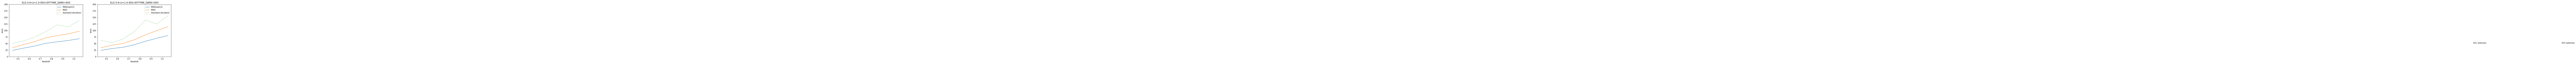

In [238]:
plot_the_curve(base_line_catalog,base_line_catalog_SV3)

In [9]:
object_type ='BGS'
diretory = '/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/cascades/3.1/BGS_ANY/'
if object_type =='BGS':
    dataname = 'alltiles_BGS_ANYzinfo.fits'
all_catalog = Table.read(diretory+dataname)

In [10]:
final_catalog = getting_the_pair_catalog(all_catalog,object_type)

In [12]:
selection = ((final_catalog['rfibermag']<21.5) &
             (final_catalog['SPECTYPE']!=b'STAR') & 
             #(final_catalog['best_z']>0.0003) &
             (final_catalog['Z']<0.5) & (final_catalog['Z']<1.1) &
             (final_catalog['DELTACHI2']>40) & (final_catalog['DELTACHI2_2']>40) & (abs(final_catalog['dv'])<1000)
            ) 

base_line_catalog = final_catalog[selection]
SV3_selection = (((base_line_catalog['rfibermag']<20.75) & (base_line_catalog['color']<0)) | 
     ((base_line_catalog['rfibermag']<21.5) & (base_line_catalog['color']>=0)))

base_line_catalog_SV3 = base_line_catalog[SV3_selection]

In [13]:
print(ss.median_absolute_deviation(base_line_catalog['dv'])/np.sqrt(2))
print(ss.median_absolute_deviation(base_line_catalog_SV3['dv'])/np.sqrt(2))

11.249166621985236
10.408979744849947


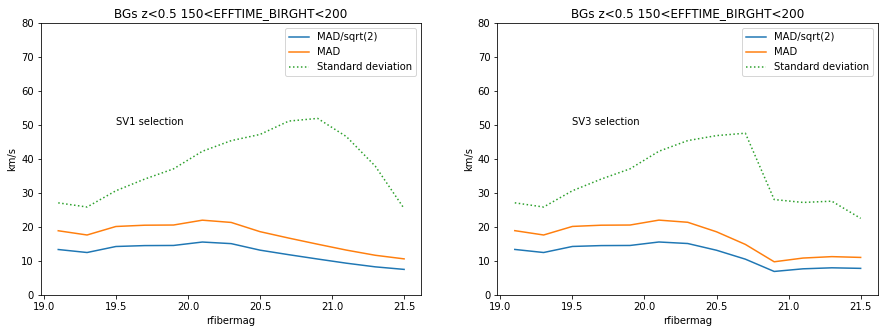

In [144]:
plot_the_curve(base_line_catalog,base_line_catalog_SV3)

In [23]:
object_type ='ELG'
if object_type=='ELG':
    all_catalog = Table.read('/global/homes/r/raichoor/sv1/sv1-elg-cascades-3.1.fits')
elif object_type == 'ELG_VI':
    all_catalog = Table.read('/global/homes/r/raichoor/sv1/sv1-elg-cascades-3.1.fits')
    


In [28]:
final_catalog = getting_the_pair_catalog(all_catalog,object_type)

In [29]:

selection = ((final_catalog['quality']==1) & 
            (abs(final_catalog['dv'])<1000) & #(final_catalog['dv']!=0) &
             (((final_catalog['Z']>0.6) & 
             (final_catalog['Z']<1.497)) | ((final_catalog['Z']>1.501) & (final_catalog['Z']<1.58)))
             )  
base_line_catalog = final_catalog[selection]
SV3_selection = ((base_line_catalog['GTOT']>20) &
                 (base_line_catalog['GFIB']<24.1) &
                 (base_line_catalog['RZ']>0.15) & 
                 (base_line_catalog['GR']<0.1+0.5*base_line_catalog['RZ']) &
                 (base_line_catalog['GR']<-1.2*base_line_catalog['RZ']+1.6))
base_line_catalog_SV3 = base_line_catalog[SV3_selection]

In [30]:
print(ss.median_absolute_deviation(base_line_catalog['dv'])/np.sqrt(2))
print(ss.median_absolute_deviation(base_line_catalog_SV3['dv'])/np.sqrt(2))

8.229038454834528
7.526295199512863


[22.13795558394045, 21.489613795406573, 19.711258554345402, 27.494061864898555, 38.071366220581844, 38.238142571159585, 31.90168579265945, 54.37060481622006, 45.712341724542746, 71.28122647338432]
[14.772614812918084, 15.702839845025645, 13.235887961319058, 21.1562953499908, 27.60690097078141, 31.50075737727293, 28.004462879462192, 42.64145185705336, 41.801425183916194, 61.71739983943189]


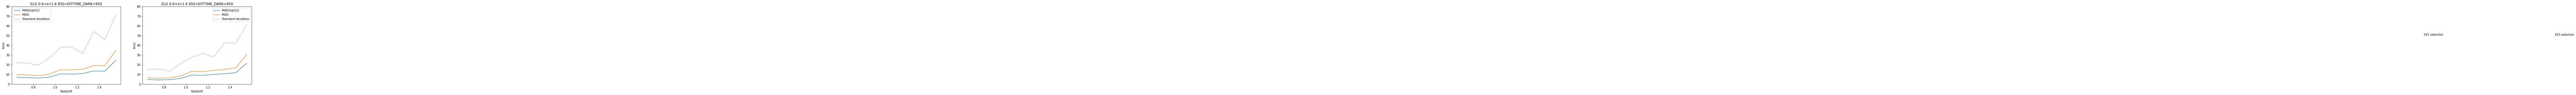

In [219]:
plot_the_curve(base_line_catalog,base_line_catalog_SV3)